# Опционный калькулятор 2.

#### Описание:

- Применим формулу Блека - Шоулза для определения стоимости опциона,
- применим пользовательские классы опциона и фьючерса,
- выведем графики прибыли / убытка по опциону на дату погашения.

## Импорты.

#### Библиотеки:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Настройки:

In [2]:
sns.set_theme()

In [3]:
import sys

In [4]:
sys.path.append('../')

In [5]:
sys.path.append('../includes/')

#### Формула Блека - Шоулза:

In [6]:
from includes import black_sholes_model as bs

#### Классы для опциона (из предыдущего раздела), а также новый класс для фьючерса:

In [7]:
from includes.classes import Option, Future

#### В класс опциона была добавлена следующая пользовательская функция расчета профиля прибыли / убытка на дату погашения:

In [8]:
def options_profit_loss_profile(spot_range_, strike_, option_premium_, option_type_):
    if option_type_ == 'Call':
        return np.where(
            (spot_range_ < strike_),
            (0 - option_premium_),
            (spot_range_ - strike_ - option_premium_)
        )
    if option_type_ == 'Put':
        return np.where(
            (spot_range_ < strike_),
            (strike_ - spot_range_ - option_premium_),
            (0 - option_premium_)
        )

#### Функция расчета профиля profit / loss для фьючерса

In [9]:
def futures_profit_loss_profile(spot_range_, initial_price_):
    return (spot_range_ - initial_price_)

## Расчет прибыли / убытка по опциону на дату погашения.

#### Цена спот (для расчета премии опциона):

In [10]:
spot = 100000

#### Страйк опциона

In [11]:
strike = 100000

#### Подразумеваемая волатильность:

In [12]:
volatility = 25

#### Число дней до экспирации:

In [13]:
t = 21

#### Объект опциона call:

In [14]:
call = Option(spot, strike, volatility, t, 'Call')

In [15]:
print(call)

Страйк: 100000.
Дней до экспирации: 21.
Тип опциона: Call.
Премия опциона: 2391.93.
Дельта опциона: 0.5120.
Гамма опциона: 0.00006650.
1 / Гамма опциона: 15037.94.
Тета опциона: -56.93.
Вега опциона: 95.65.



#### Объект опциона put:

In [16]:
put = Option(spot, strike, volatility, t, 'Put')

In [17]:
print(put)

Страйк: 100000.
Дней до экспирации: 21.
Тип опциона: Put.
Премия опциона: 2391.93.
Дельта опциона: -0.4880.
Гамма опциона: 0.00006650.
1 / Гамма опциона: 15037.94.
Тета опциона: -56.93.
Вега опциона: 95.65.



#### Размер позиции по опционам

In [18]:
position_size = 1

### Рассчитаем профиль P/L для опциона call

#### Зададим диапазон цен спот (для отображения по оси x на графике)

In [19]:
spot_range = np.arange(50000, 150000, 500)

#### Построим график:

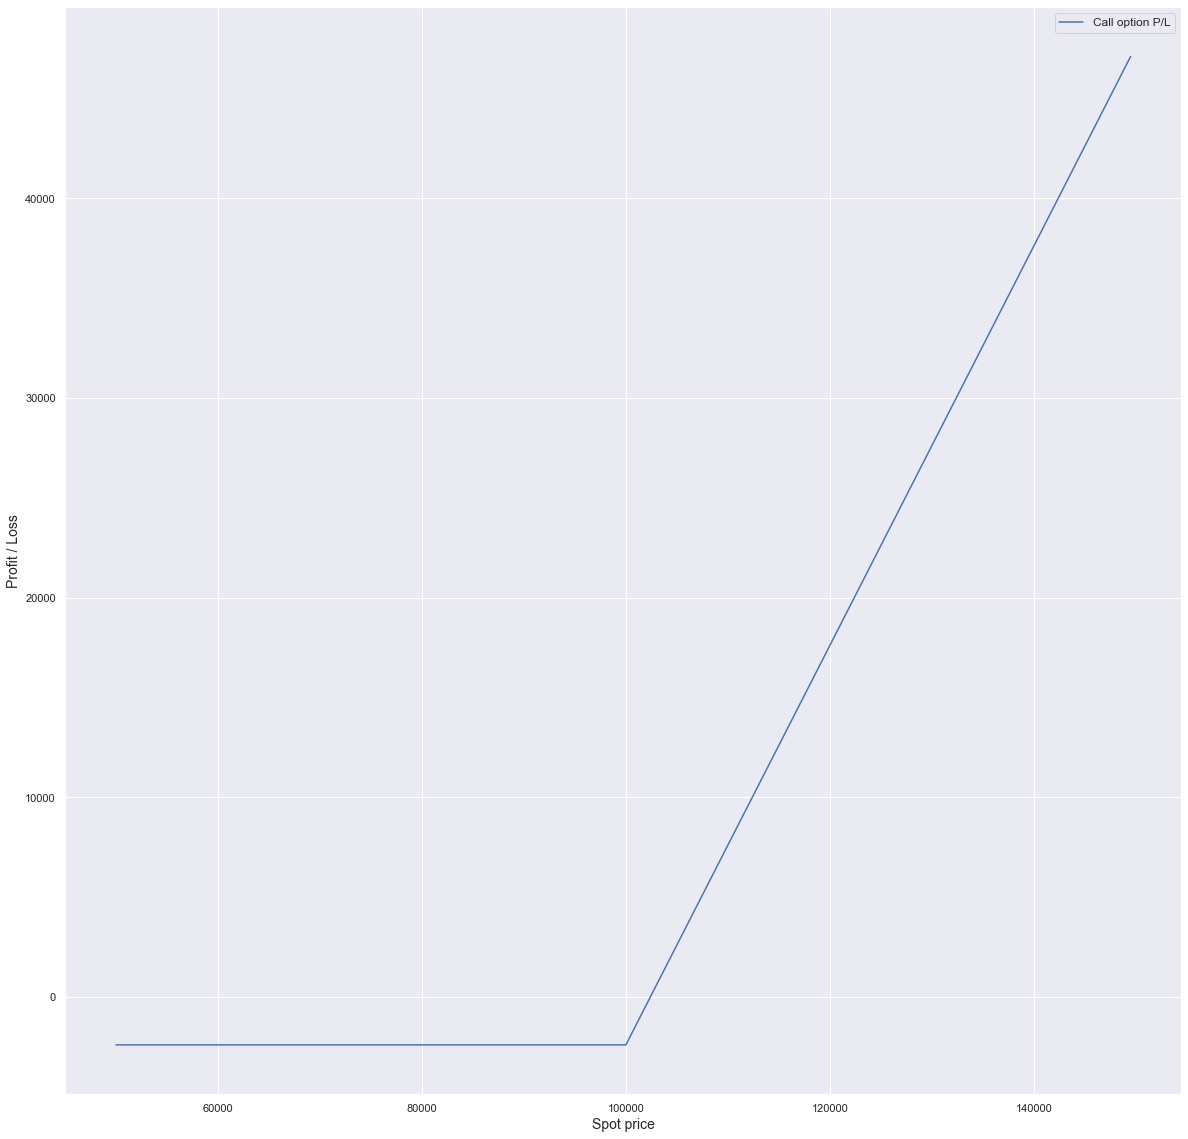

In [20]:
plt.figure(figsize=(20, 20))
plt.plot(
    spot_range,
    call.profit_loss_profile(spot_range) * position_size,
    label = 'Call option P/L'
)
plt.xlabel('Spot price', fontsize=14)
plt.ylabel('Profit / Loss', fontsize=14)
plt.grid(True)
plt.legend(loc='best', fontsize=12)
plt.show()

### Рассчитаем профиль P/L для опциона put (при тех же условиях)

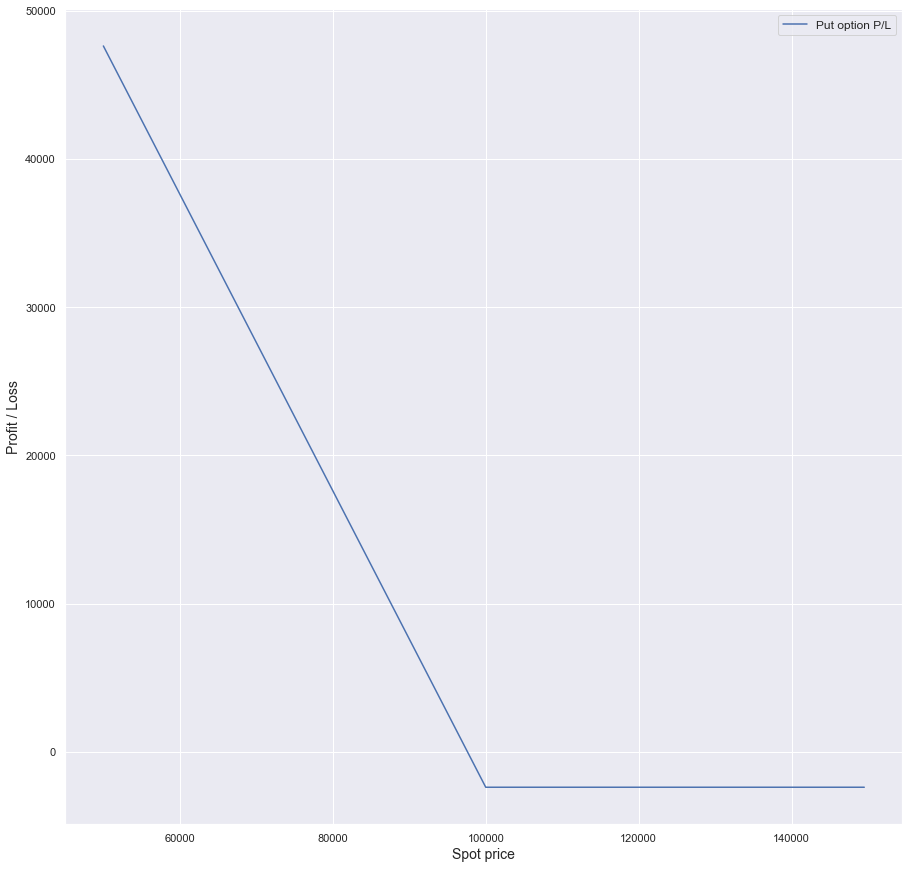

In [21]:
plt.figure(figsize=(15, 15))
plt.plot(
    spot_range,
    put.profit_loss_profile(spot_range) * position_size,
    label = 'Put option P/L'
)
plt.xlabel('Spot price', fontsize=14)
plt.ylabel('Profit / Loss', fontsize=14)
plt.grid(True)
plt.legend(loc='best', fontsize=12)
plt.show()

### Построим график профиля P/L на дату погашения для портфеля фьючерсов и опционов.

#### Добавим составляющую по фьючерсам

In [22]:
fut_position = 0
fut_price = 100000

In [23]:
future = Future(fut_price)

In [24]:
print(future)

Тип: Fut.
Цена открытия позиции: 100000.00.
Дельта: 1.



#### Добавим составляющую по опционам call

In [25]:
print(call)

Страйк: 100000.
Дней до экспирации: 21.
Тип опциона: Call.
Премия опциона: 2391.93.
Дельта опциона: 0.5120.
Гамма опциона: 0.00006650.
1 / Гамма опциона: 15037.94.
Тета опциона: -56.93.
Вега опциона: 95.65.



In [26]:
call_position = 1

#### Добавим составляющую по опционам put

In [27]:
print(put)

Страйк: 100000.
Дней до экспирации: 21.
Тип опциона: Put.
Премия опциона: 2391.93.
Дельта опциона: -0.4880.
Гамма опциона: 0.00006650.
1 / Гамма опциона: 15037.94.
Тета опциона: -56.93.
Вега опциона: 95.65.



In [28]:
put_position = 1

#### Построим график

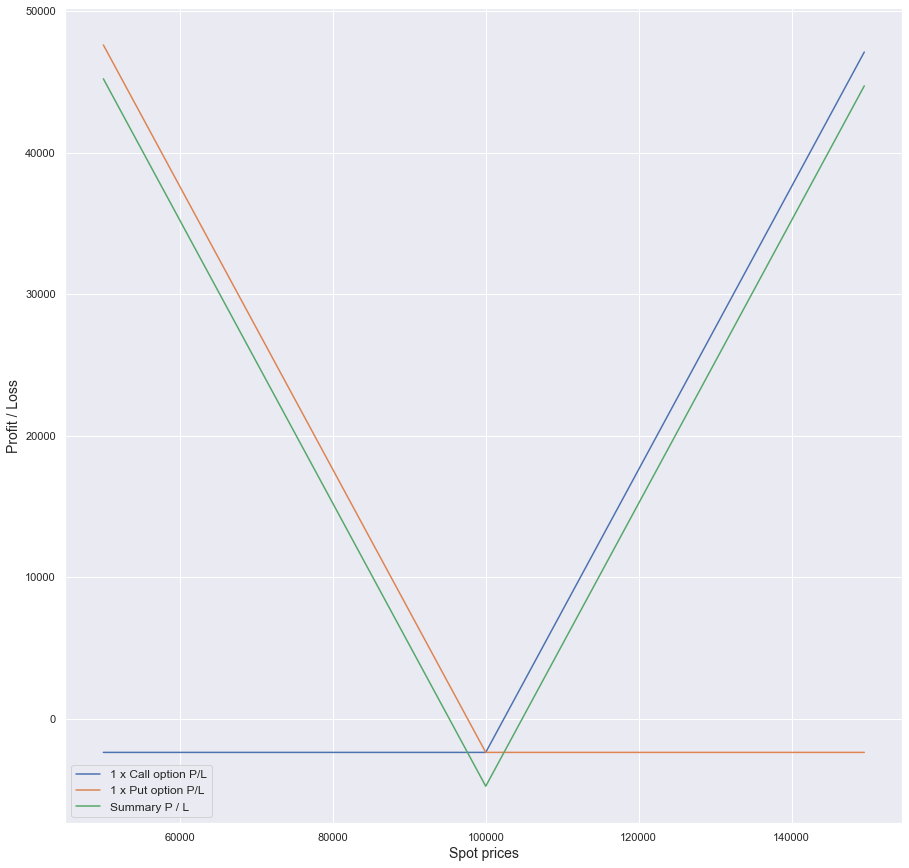

In [29]:
plt.figure(figsize = (15, 15))

if fut_position != 0:
    if abs(fut_position) == 1:
        fut_pos_lbl = f'{fut_position} x Future P/L'
    else:
        fut_pos_lbl = f'{fut_position} x Futures P/L'
    plt.plot(
        spot_range,
        future.profit_loss_profile(spot_range) * fut_position,
        label = fut_pos_lbl
    )
    
if call_position != 0:
    if abs(call_position) == 1:
        call_pos_lbl = f'{call_position} x Call option P/L'
    else:
        call_pos_lbl = f'{call_position} x Call options P/L'
    plt.plot(
        spot_range,
        call.profit_loss_profile(spot_range) * call_position,
        label = call_pos_lbl
    )
    
if put_position != 0:
    if abs(put_position) == 1:
        put_pos_lbl = f'{put_position} x Put option P/L'
    else:
        put_pos_lbl = f'{put_position} x Put options P/L'
    plt.plot(
        spot_range,
        put.profit_loss_profile(spot_range) * put_position,
        label = put_pos_lbl
    )
    
plt.plot(
        spot_range,
        (
            future.profit_loss_profile(spot_range) * fut_position
            + call.profit_loss_profile(spot_range) * call_position
            + put.profit_loss_profile(spot_range) * put_position
        ),
        label = 'Summary P / L'
    )

plt.xlabel('Spot prices', fontsize=14)
plt.ylabel('Profit / Loss', fontsize=14)
plt.grid(True)
plt.legend(loc='best', fontsize=12)
plt.show()